# Hotel booking demand 数据分析与分类预测

该数据集包含一个文件，用于比较两个酒店之间的各种预订信息：城市酒店和度假酒店。包括预订时间、入住时间、成人、儿童和/或婴儿数量以及可用停车位数量等信息。
Github网址：https://github.com/zhangxin9988/Mutual_Evaluation3.git

In [1]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt

In [3]:
data_origin=pd.read_csv("C:/学习/办公/研究生课程/研一第二学期课程/数据挖掘/hotel_bookings.csv")

In [4]:
data_origin.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [5]:
#该数据集一共有32列，我们没有对所有的列进行分析，而是选出一部分。
data=pd.DataFrame(data_origin[['hotel','is_canceled','arrival_date_year','arrival_date_month','arrival_date_day_of_month','meal','previous_bookings_not_canceled','reserved_room_type','customer_type','adr','reservation_status','reservation_status_date']])

In [6]:
data.head(10)

,hotel,is_canceled,arrival_date_year,arrival_date_month,arrival_date_day_of_month,meal,previous_bookings_not_canceled,reserved_room_type,customer_type,adr,reservation_status,reservation_status_date
0,Resort Hotel,0,2015,July,1,BB,0,C,Transient,0.0,Check-Out,2015-07-01
1,Resort Hotel,0,2015,July,1,BB,0,C,Transient,0.0,Check-Out,2015-07-01
2,Resort Hotel,0,2015,July,1,BB,0,A,Transient,75.0,Check-Out,2015-07-02
3,Resort Hotel,0,2015,July,1,BB,0,A,Transient,75.0,Check-Out,2015-07-02
4,Resort Hotel,0,2015,July,1,BB,0,A,Transient,98.0,Check-Out,2015-07-03
5,Resort Hotel,0,2015,July,1,BB,0,A,Transient,98.0,Check-Out,2015-07-03
6,Resort Hotel,0,2015,July,1,BB,0,C,Transient,107.0,Check-Out,2015-07-03
7,Resort Hotel,0,2015,July,1,FB,0,C,Transient,103.0,Check-Out,2015-07-03
8,Resort Hotel,1,2015,July,1,BB,0,A,Transient,82.0,Canceled,2015-05-06
9,Resort Hotel,1,2015,July,1,HB,0,D,Transient,105.5,Canceled,2015-04-22


## 1.基本情况：城市酒店和假日酒店预订需求和入住率比较；

### 1.1预订需求比较

In [7]:
data.replace('Undefined','SC',inplace=True) #将meal一列值为Undefined全部替换为SC
#将两个酒店的数据分开保存，方便后续的比较
data_rh=data[(data.hotel=='Resort Hotel') ]
data_ch=data[(data.hotel=='City Hotel') ]

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'L', 'P']


([<matplotlib.axis.XTick at 0x2124fbd5bc8>,
 <a list of 10 Text xticklabel objects>)

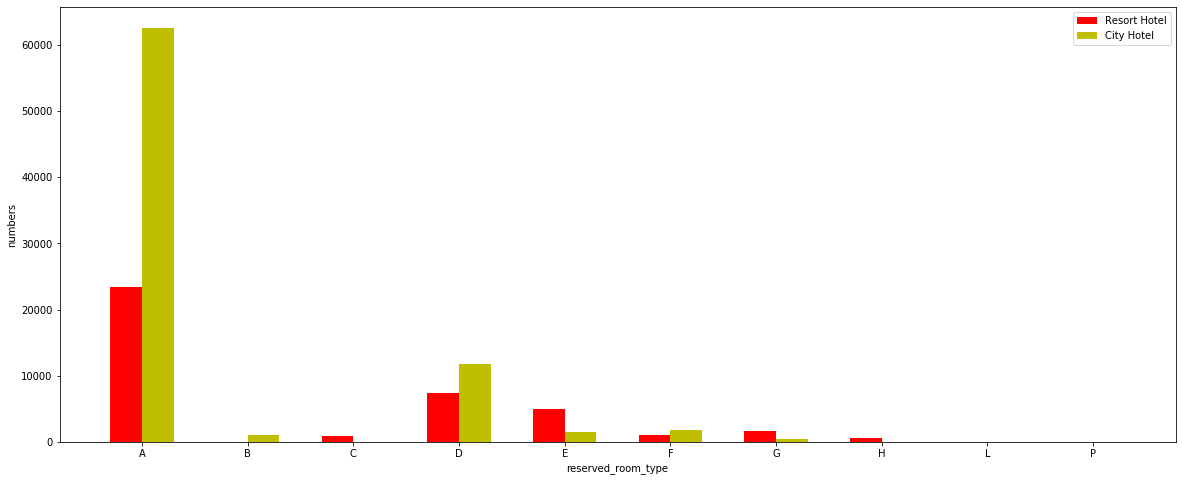

In [40]:
#预订房间类型比较
plt.figure(figsize=(20, 8))
room_type=set(list(data_rh.reserved_room_type.value_counts().index)+list(data_ch.reserved_room_type.value_counts().index))
room_type=sorted(list(room_type))
print(room_type)
x=np.arange(len(room_type))
bar_width=0.3
plt.bar(x,data_rh.reserved_room_type.value_counts()[room_type],bar_width,color='r', label='Resort Hotel') 
plt.bar(x+bar_width,data_ch.reserved_room_type.value_counts()[room_type],bar_width,color='y', label='City Hotel')
plt.xlabel('reserved_room_type')
plt.ylabel('numbers')
plt.legend(['Resort Hotel','City Hotel'])  
plt.xticks(x+bar_width/2,room_type) 

上图说明人们在预订假日酒店或城市酒店时的预定A类房间的占比很大，其次是D类房间。对于假日酒店的第三选择，更多的人选择E类；而对于城市酒店的第三选择，更多的人选择F类。

### 1.2入住率比较

In [41]:
#入住率=预定未取消记录数/总记录数
occupancy_rh=data_rh[data_rh.is_canceled==0].is_canceled.count()/data_rh.is_canceled.count()
occupancy_ch=data_ch[data_ch.is_canceled==0].is_canceled.count()/data_ch.is_canceled.count()
print('假日酒店的入住率={:.3}'.format(occupancy_rh))
print('城市酒店的入住率={:.3}'.format(occupancy_ch))

假日酒店的入住率=0.722
城市酒店的入住率=0.583


## 2.用户行为：提前预订时间、入住时长、预订间隔、餐食预订情况分析

### 2.1.提前预订时间分析

In [42]:
data_lead=data_origin[['hotel','is_canceled','lead_time'  ]]
data_lead_rh=data_lead[(data_lead.hotel=='Resort Hotel')& data_lead.is_canceled==0]
data_lead_ch=data_lead[(data_lead.hotel=='City Hotel')& data_lead.is_canceled==0]

Text(0, 0.5, 'counts')

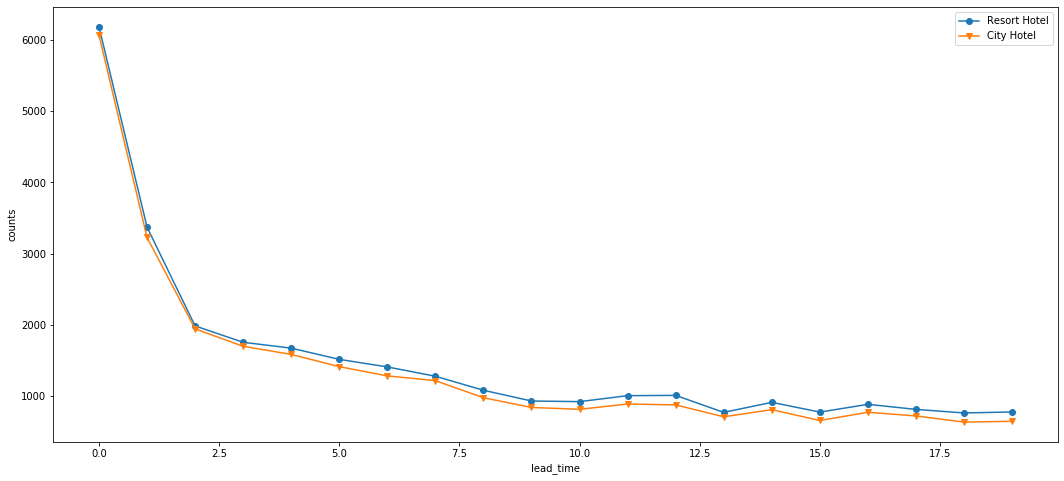

In [53]:
#绘制假日酒店和城市酒店提前预订时间与对应记录条数的散点图
plt.figure(figsize=(18, 8))
rh_lead_time=data_lead_rh.lead_time.value_counts().sort_index()
ch_lead_time=data_lead_ch.lead_time.value_counts().sort_index()
plt.plot(rh_lead_time[0:20].index,rh_lead_time[0:20],marker='o',label='Resort Hotel')
plt.plot(ch_lead_time[0:20].index,ch_lead_time[0:20],marker='v',label='City Hotel')
plt.legend() 
plt.xlabel('lead_time')  
plt.ylabel('counts')  

从上图可以看出，大部分人会选择提前五天订购房间

### 2.2.入住时长分析  入住时长=预订最后状态时间-到达时间

In [55]:
data_bookdate=pd.DataFrame(data[['arrival_date_year','arrival_date_month','arrival_date_day_of_month','reservation_status_date']])

In [56]:
data_bookdate.head(10)

,arrival_date_year,arrival_date_month,arrival_date_day_of_month,reservation_status_date
0,2015,July,1,2015-07-01
1,2015,July,1,2015-07-01
2,2015,July,1,2015-07-02
3,2015,July,1,2015-07-02
4,2015,July,1,2015-07-03
5,2015,July,1,2015-07-03
6,2015,July,1,2015-07-03
7,2015,July,1,2015-07-03
8,2015,July,1,2015-05-06
9,2015,July,1,2015-04-22


In [57]:
#将月份表示为字符串
class_mapping = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9,'October': 10,'November': 11,'December': 12}
data_bookdate.arrival_date_month=data_bookdate.arrival_date_month.map(class_mapping)

In [58]:
data_bookdate['reservation_status_date']=pd.to_datetime(data_bookdate['reservation_status_date'])#转换为日期格式
data_bookdate['reservation_status_date_year']=data_bookdate['reservation_status_date'].dt.year
data_bookdate['reservation_status_date_month']=data_bookdate['reservation_status_date'].dt.month
data_bookdate['reservation_status_date_day']=data_bookdate['reservation_status_date'].dt.day

In [59]:
data_bookdate.drop(columns=['reservation_status_date'],inplace=True)

In [61]:
data_bookdate.head(10)

,arrival_date_year,arrival_date_month,arrival_date_day_of_month,reservation_status_date_year,reservation_status_date_month,reservation_status_date_day
0,2015,7,1,2015,7,1
1,2015,7,1,2015,7,1
2,2015,7,1,2015,7,2
3,2015,7,1,2015,7,2
4,2015,7,1,2015,7,3
5,2015,7,1,2015,7,3
6,2015,7,1,2015,7,3
7,2015,7,1,2015,7,3
8,2015,7,1,2015,5,6
9,2015,7,1,2015,4,22


In [62]:
import datetime

In [63]:
book_days_list=[]
for i in range(0, len(data_bookdate)):
    a_date=datetime.date(data_bookdate.iloc[i]['arrival_date_year'],data_bookdate.iloc[i]['arrival_date_month'],data_bookdate.iloc[i]['arrival_date_day_of_month'])
    r_date=datetime.date(data_bookdate.iloc[i]['reservation_status_date_year'],data_bookdate.iloc[i]['reservation_status_date_month'],data_bookdate.iloc[i]['reservation_status_date_day'])
    book_days_list.append((r_date-a_date).days) #计算每条记录的入住时长

In [64]:
book_days=pd.Series(book_days_list)

In [21]:
book_days.value_counts()[0:20]

 1     15747
 3     15723
 2     15479
 4     11024
 7      5679
 5      5119
 0      2793
 6      2322
 10      780
 8       719
-3       718
 14      654
-6       636
-1       630
-5       603
-7       599
-11      593
-4       581
-16      531
 9       526
dtype: int64

Text(0, 0.5, 'counts')

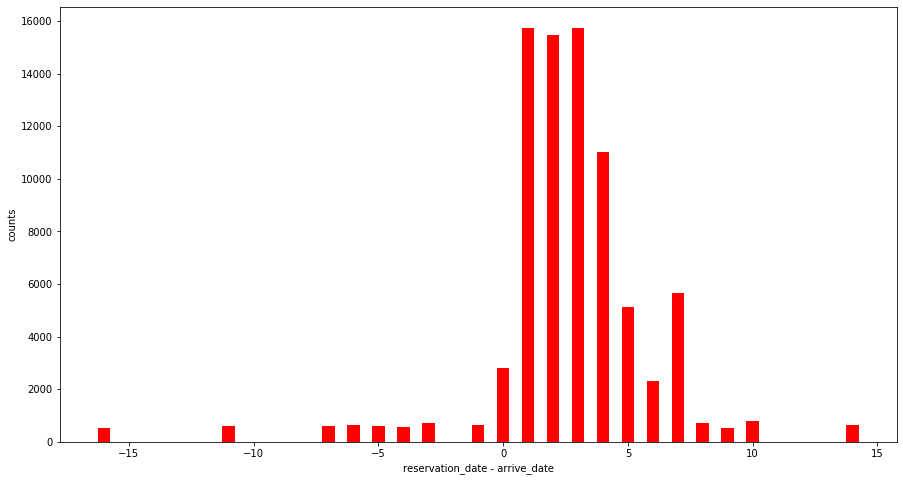

In [65]:
#绘制入住时长与对应记录数量的条形统计图
plt.figure(figsize=(15, 8))
plt.bar(book_days.value_counts()[0:20].index,book_days.value_counts()[0:20],width=0.5,color='red')
plt.xlabel('reservation_date - arrive_date')  
plt.ylabel('counts')  

上图说明对于假日酒店和城市酒店，绝大部分人的入住时长都集中在0-10天之间。（入住时长为负是因为客户取消预订或未办理入住手续导致预订最后状态时间早于到达时间）

### 2.3预定间隔分析

In [66]:
data_repeat=pd.DataFrame( data_origin[['is_repeated_guest','agent','reservation_status_date']] )

In [67]:
#以agent ID=240的客户为例：
data_repeat=pd.DataFrame(data_repeat[(data_repeat.is_repeated_guest==1)&(data_repeat.agent==240) ] )

In [68]:
data_repeat.drop_duplicates('reservation_status_date',inplace=True) #删除所有列值相同的记录

In [69]:
data_repeat['reservation_status_date']=pd.to_datetime(data_repeat['reservation_status_date'])#转换为日期格式

In [70]:
data_repeat['year']=data_repeat['reservation_status_date'].dt.year
data_repeat['month']=data_repeat['reservation_status_date'].dt.month
data_repeat['day']=data_repeat['reservation_status_date'].dt.day

In [71]:
data_repeat.drop(columns=['reservation_status_date'],inplace=True)

In [72]:
book_repeat_list=[]
for i in range(0, len(data_repeat)):
    repeat=datetime.date(int(data_repeat.iloc[i]['year']),int(data_repeat.iloc[i]['month']),int(data_repeat.iloc[i]['day']) )
    book_repeat_list.append(repeat) 

In [73]:
book_repeat_list.sort() 

In [74]:
gap={}
for index,i in enumerate(book_repeat_list):
    if index==len(book_repeat_list)-1:
        break
    gap[index]= (book_repeat_list[index+1]-book_repeat_list[index]).days  

Text(0, 0.5, 'gap numbers')

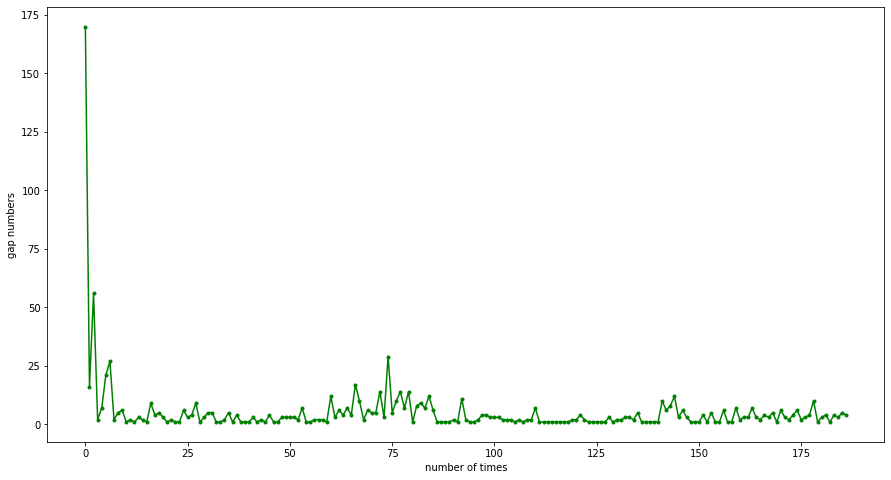

In [81]:
#绘制每次预订相隔天数的折线图
plt.figure(figsize=(15, 8))
plt.plot(list(gap.keys()),list(gap.values()),'g.-')
plt.xlabel('number of times')  
plt.ylabel('gap numbers') 

In [82]:
### 2.4.餐食预订情况分析

Text(0.5, 1.0, 'comparison of meal')

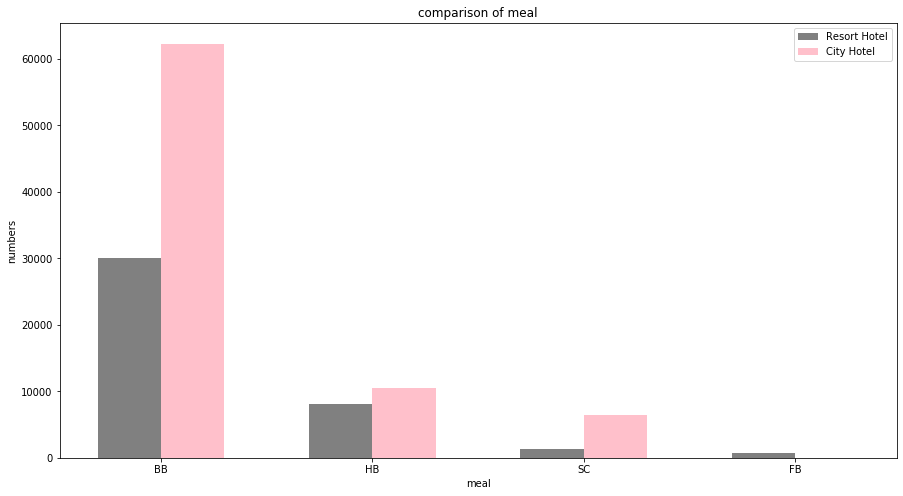

In [87]:
#订餐类型比较
bar_width = 0.3 # 条形宽度
index_rh = np.arange(len(data_rh.meal.value_counts().index))  
index_ch = index_rh + bar_width  
plt.figure(figsize=(15, 8))
plt.bar(index_rh,data_rh.meal.value_counts(),width=bar_width,color='gray', label='Resort Hotel')
plt.bar(index_ch,data_ch.meal.value_counts(),width=bar_width,color='pink', label='City Hotel')
plt.legend()  
plt.xticks(index_rh + bar_width/2, data_rh.meal.value_counts().index)  # 让横坐标轴刻度显示data_rh.meal.value_counts().index， index_rh + bar_width/2 为横坐标轴刻度的位置
plt.xlabel('meal')  
plt.ylabel('numbers') 
plt.title('comparison of meal')  

上图说明在城市酒店居住的客户比在假日酒店居住的客户的订餐需求更高；且绝大部分客户选择只预订早餐（即BB）

# 3.一年中最佳预订酒店时间分析

In [109]:
data_bestBooking=pd.DataFrame(data_origin[['hotel','is_canceled','arrival_date_year','arrival_date_month','arrival_date_day_of_month']])

In [110]:
#首先看假日酒店和城市酒店的最佳预订月份
data_bestBooking_rh=data_bestBooking[(data_bestBooking.hotel=='Resort Hotel')&(data_bestBooking.is_canceled==0)]
data_bestBooking_ch=data_bestBooking[(data_bestBooking.hotel=='City Hotel')&(data_bestBooking.is_canceled==0)]

Text(0.5, 1.0, 'Resort Hotel V.S. City Hotel')

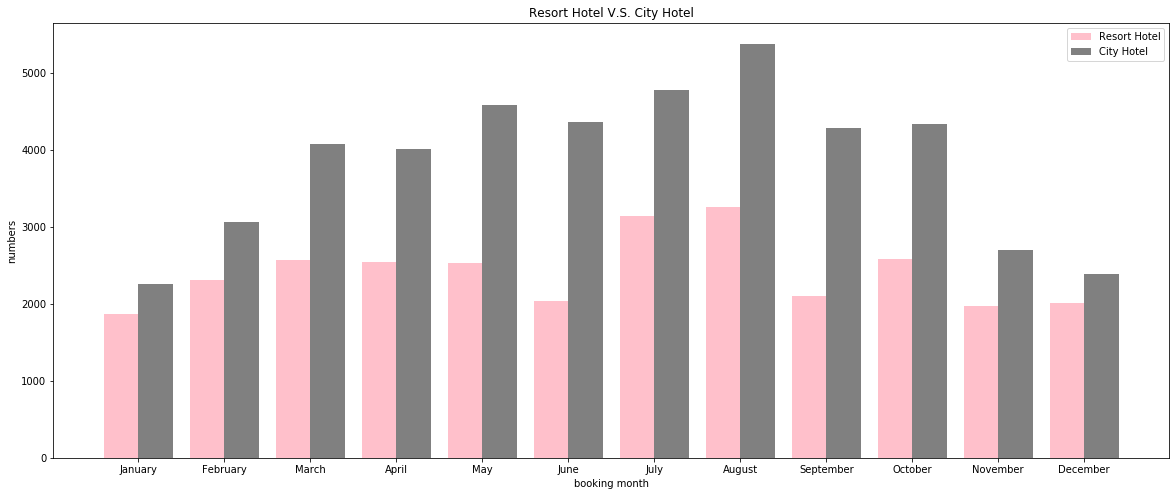

In [111]:
plt.figure(figsize=(20, 8))
rh_arrival_month=data_bestBooking_rh.arrival_date_month.value_counts()
rh_arrival_month=pd.Series(rh_arrival_month,index=['January','February','March','April','May','June','July','August','September','October','November','December'])
ch_arrival_month=data_bestBooking_ch.arrival_date_month.value_counts()
ch_arrival_month=pd.Series(ch_arrival_month,index=['January','February','March','April','May','June','July','August','September','October','November','December'])
bar_width=0.4
x=np.arange(12)
plt.bar(x,rh_arrival_month,bar_width,color='pink', label='Resort Hotel')
plt.bar(x+bar_width,ch_arrival_month,bar_width,color='gray', label='City Hotel')
plt.xlabel('booking month')
plt.ylabel('numbers') 
plt.xticks(x+bar_width/2,ch_arrival_month.index)
plt.legend(['Resort Hotel','City Hotel'])
plt.title('Resort Hotel V.S. City Hotel')  

上图表明无论是假日酒店还是城市酒店的最佳预订月份均为8月（August）,下面看最佳预订日期

In [113]:
data_bestBooking_rh_day=data_bestBooking[(data_bestBooking.hotel=='Resort Hotel')&(data_bestBooking.is_canceled==0)&(data_bestBooking.arrival_date_month=='August')]
data_bestBooking_ch_day=data_bestBooking[(data_bestBooking.hotel=='City Hotel')&(data_bestBooking.is_canceled==0)&(data_bestBooking.arrival_date_month=='August')]

Text(0.5, 1.0, 'City Hotel')

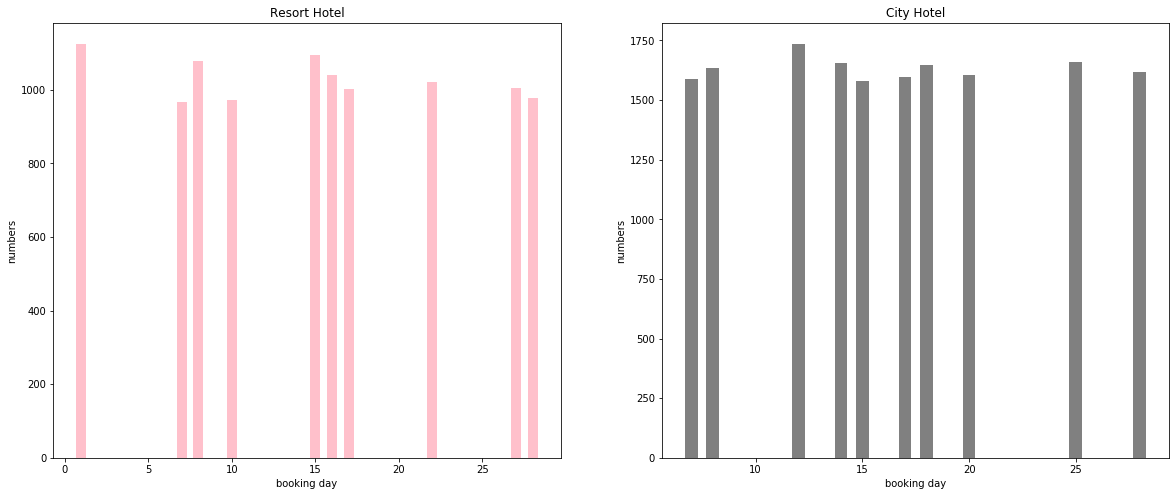

In [114]:
plt.figure(figsize=(20, 8))
plt.subplot(1,2,1)
plt.bar(data_bestBooking_rh_day.arrival_date_day_of_month.value_counts()[0:10].index,data_bestBooking_rh.arrival_date_day_of_month.value_counts()[0:10],width=0.6,color='pink', label='Resort Hotel')
plt.xlabel('booking day')
plt.ylabel('numbers') 
plt.title('Resort Hotel')  
plt.subplot(1,2,2)
plt.bar(data_bestBooking_ch_day.arrival_date_day_of_month.value_counts()[0:10].index,data_bestBooking_ch.arrival_date_day_of_month.value_counts()[0:10],width=0.6,color='gray', label='City Hotel')
plt.xlabel('booking day')
plt.ylabel('numbers') 
plt.title('City Hotel')  

上图表明假日酒店的一年中最佳预订时间为8月1日；城市酒店一年中最佳预订时间为8月12日

# 4.利用LogisticRegression预测酒店预订状态 

### 利用数据信息预测酒店预订的最后状态   
0-客户已入住并退房   
1--预定取消  
2--客人未办理入住手续 

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [116]:
data_LR=pd.DataFrame(data_origin[['hotel','is_canceled','lead_time','adults','children','babies','meal','previous_cancellations','previous_bookings_not_canceled','booking_changes','adr','reservation_status']])

In [117]:
data_LR.replace('Undefined','SC',inplace=True) #将meal一列值为Undefined全部替换为SC

In [118]:
class_mapping1 = {'Resort Hotel': 0,'City Hotel':1}
class_mapping2 = {'Check-Out':0,'Canceled':1,'No-Show':2}
data_LR.hotel=data_LR.hotel.map(class_mapping1)
data_LR.reservation_status=data_LR.reservation_status.map(class_mapping2)

In [119]:
meal_onehot=pd.get_dummies(data_LR.meal) 

In [121]:
data_bookdate.head(10)

,arrival_date_year,arrival_date_month,arrival_date_day_of_month,reservation_status_date_year,reservation_status_date_month,reservation_status_date_day
0,2015,7,1,2015,7,1
1,2015,7,1,2015,7,1
2,2015,7,1,2015,7,2
3,2015,7,1,2015,7,2
4,2015,7,1,2015,7,3
5,2015,7,1,2015,7,3
6,2015,7,1,2015,7,3
7,2015,7,1,2015,7,3
8,2015,7,1,2015,5,6
9,2015,7,1,2015,4,22


In [122]:
data_LR=pd.concat([data_LR,meal_onehot,data_bookdate],axis = 1)

In [123]:
data_LR.drop(['meal'], axis=1,inplace=True)

In [124]:
data_LR.adr=data_LR.adr.astype('int')

In [125]:
data_LR.dropna(inplace=True)

In [127]:
data_LR.head(10)

,hotel,is_canceled,lead_time,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,adr,...,BB,FB,HB,SC,arrival_date_year,arrival_date_month,arrival_date_day_of_month,reservation_status_date_year,reservation_status_date_month,reservation_status_date_day
0,0,0,342,2,0.0,0,0,0,3,0,...,1,0,0,0,2015,7,1,2015,7,1
1,0,0,737,2,0.0,0,0,0,4,0,...,1,0,0,0,2015,7,1,2015,7,1
2,0,0,7,1,0.0,0,0,0,0,75,...,1,0,0,0,2015,7,1,2015,7,2
3,0,0,13,1,0.0,0,0,0,0,75,...,1,0,0,0,2015,7,1,2015,7,2
4,0,0,14,2,0.0,0,0,0,0,98,...,1,0,0,0,2015,7,1,2015,7,3
5,0,0,14,2,0.0,0,0,0,0,98,...,1,0,0,0,2015,7,1,2015,7,3
6,0,0,0,2,0.0,0,0,0,0,107,...,1,0,0,0,2015,7,1,2015,7,3
7,0,0,9,2,0.0,0,0,0,0,103,...,0,1,0,0,2015,7,1,2015,7,3
8,0,1,85,2,0.0,0,0,0,0,82,...,1,0,0,0,2015,7,1,2015,5,6
9,0,1,75,2,0.0,0,0,0,0,105,...,0,0,1,0,2015,7,1,2015,4,22


In [128]:
y = data_LR['reservation_status']  #用reservation_status一列的值做标签
x = data_LR.drop('reservation_status',axis=1)
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1)

In [129]:
logreg=LogisticRegression().fit(X_train,y_train)

C:\Users\zx\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\zx\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [130]:
print("Training set score:{:.4f}".format(logreg.score(X_train,y_train)))

Training set score:0.9895


In [131]:
print("Test set score:{:.4f}".format(logreg.score(X_test,y_test)))

Test set score:0.9906


绘制在C=1时，Logistic回归在该数据集上学到的系数

Text(0, 0.5, 'para values')

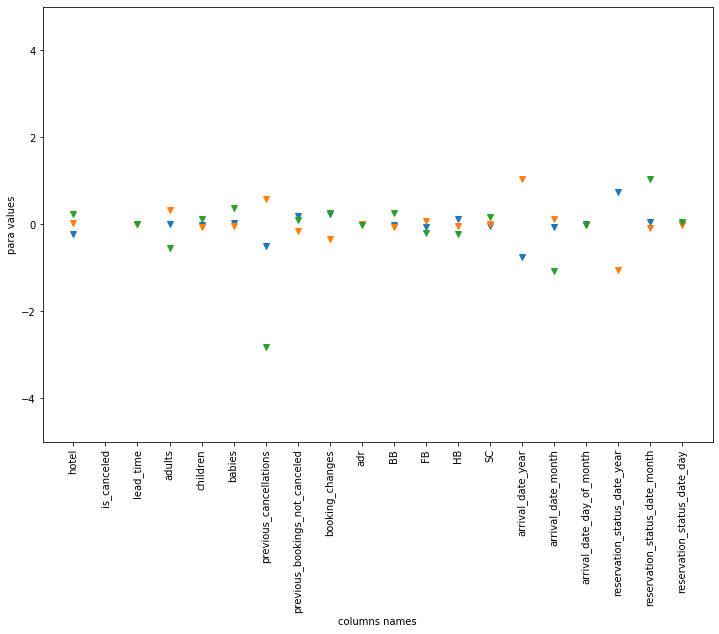

In [132]:
plt.figure(figsize=(12, 8))
plt.plot(logreg.coef_.T,'v')
plt.xticks(range(x.shape[1]),x.columns,rotation=90)
plt.ylim(-5,5)
plt.xlabel('columns names')
plt.ylabel('para values')